# ACM SIGKDD Austin 
# Advanced Machine Learning with Python
## Class 1: Pre-Model Workflow
### Jaya Zenchenko
### Nov 18th, 2015

We will primarily be working out of the Scikit Learn Cookbook.  I love to use Jupyter notebooks so this presentation will be slides from the notebook.  Recently started using the live-reveal extension to make slides of my notebook.   You can download it and play around with the examples yourself later.  Also a reminder that this course is intended to be at the intermediate level.

# Pre-Model Workflow : Scikit Learn Cookbook

- Why Pre-process data?
- Filling in Missing Values
- Dealing with Numerical and Categorical Variables
- Scaling/Normalizing
- Pipeline for Pre-processing data
- References


So we will be going over pre-model workflow primarily out of the scikit learn cookbook, but I'll also be including other examples not in the book.  How many people here have used scikit-learn before?  How many people here have had experience with data cleaning?  I have had some experience with data preprocessing, I have learned a lot by dealing with very messy data.  I think the best way to have the importance of data cleaning and preprocessing understood is by dealing with it often.  Always learning some new trick or finding some new aberration in data. I would love for others to share as we go through some of these sections if they have examples of atrocious data and how they worked around it.  

#### Install Watermark for Reproducibility:

In [1]:
%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py
%load_ext watermark

Installed watermark.py. To use it, type:
  %load_ext watermark


/Users/bzenchenko/anaconda/envs/Py3/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [2]:
%watermark -a "Jaya Zenchenko" -n -t -z -u -h -m -w -v -p scikit-learn,matplotlib,pandas,seaborn,numpy,scipy,conda

DistributionNotFound: The 'scikit-learn' distribution was not found and is required by the application

Ever since I discovered Watermark, I love it because it automatically documents the package versions, and information about the machine I ran the code on.  This is great for reproducibility when sharing your work/results with others.

## Why Pre-Process the data?

### Scikit Learn - Machine Learning Package for python
    - Very easy to run machine learning algorithms
    - More difficult to use the algorithms correctly 
    - Garbage in, garbage out!

So scikit learn is a machine learning package for python.  I think it is the gold standard for the way packages should be in the scientific community.  It is so easy to pick up quickly and use to build awesome models and create machine learning algorithms with.    So it's easy to use, but the real work is in 2 areas, first we need to make sure our data is cleaned and properly formatted for the various machine learning methods, and we need to make sure that the data looks the way that it should for the given model.  We want to make sure that we are satisfying the assumptions of the model before using it.  Garbage in, garbage out.   So this is why we need to preprocess our data.  

### Various issues in the data can include:
    - Noisy data (out-of-range, impossible combinations, human error, etc)
    - Missing Data (General noise/error, MCAR, MNAR, MAR)
    - Data of different types (numeric, categorical)
    - Too many attributes
    - Too much data
    - Data does not fit the assumed characteristic for a given method 


### For each of these issues, we have different solutions:
    - Imputing (filling in missing values)
    - Binary Features
    - Categorical
    - Binarizing
    - Correlation Analysis/Chi-Squared Test of Independance
    - Aggregating
    - Random Sampling
    - Scaling/Normalizing
    

So what kinds of issues can we find in our data?  Data has been known to "lie".  It comes from various sources such as people, sensors, the internet, and all these have been known to lie sometimes.  We can have noisy data, missing data, different types of data, too much data, and data values not as expected.  I'll be going over a few examples of these today, primarily ways of filling in missing data, dealing with data of different types, and scaling and normalizing.

## Example Datasets:

### Download Data Sets:
- scikit learn datasets
- UCI Machine Learning Repository
- Kaggle Data Sets
- Local government/open data sets

### Create Data Sets:
- Create data with specific properties (distributions, number of clusters, noise, etc)

Scikit learn has many built in data sets, it's a good place to start to play with these techniques and other methods for future classes.  Other data sets include the UCI Machine Learning repository, Kaggle data sets, and local government/open data sets.

Another option is to create your own fake data set with different properties (distribution, number of clusters, noise, etc).  This can be a good approach to test out different algorithms and their performance on data sets that are behaving with the assumptions in mind.

Remember that when using real data, to always spend enough time doing exploratory data analysis to understand the data before applying different methods.  


## Download Example Data set from Scikit Learn:

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
sns.set()


In [4]:
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

I like seaborn's visualization capability and integration with pandas so I'm going to download the dataset from there instead.

In [7]:
df = sns.load_dataset("iris")

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Filling in Missing Values:

Let's randomly select samples to remove so that we have missing values in our data.

In [9]:
numpy.random.seed(seed=40)
sample_idx = numpy.random.random_integers(0,df.shape[0]-1, 10 )
feature_idx = numpy.random.random_integers(0,df.shape[1]-2, 10)

In [10]:
print "sample_idx", sample_idx
print "feature_idx", feature_idx

sample_idx [ 70   7  50  12  71 114  19  74  55  91]
feature_idx [1 0 1 1 1 0 0 2 3 2]


In [11]:
for idx, jdx in zip(sample_idx, feature_idx):
    df.ix[idx, jdx] = None

In [12]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,NaN,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


scikit-learn has an Imputer function.  This has a fit_transform function and can be part of a pre-processing pipeline.

In [13]:
imputer = preprocessing.Imputer()

In [14]:
imputer

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

Strategy can take values 'mean', 'median', 'most_frequent'.  Can also give the Imputer function what the missing value looks like in the data.  Sometimes people use -1 or 99999.  

In [15]:
imputed_df = df.copy()

In [16]:
imputed_data = imputer.fit_transform(df.ix[:,0:4])

In [17]:
imputed_df.ix[:,0:4] = imputed_data

In [18]:
imputed_df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.4,0.2,setosa
1,4.900000,3.000000,1.4,0.2,setosa
2,4.700000,3.200000,1.3,0.2,setosa
3,4.600000,3.100000,1.5,0.2,setosa
4,5.000000,3.600000,1.4,0.2,setosa
5,5.400000,3.900000,1.7,0.4,setosa
6,4.600000,3.400000,1.4,0.3,setosa
7,5.854422,3.400000,1.5,0.2,setosa
8,4.400000,2.900000,1.4,0.2,setosa
9,4.900000,3.100000,1.5,0.1,setosa


In [19]:
print df.mean()
df.groupby('species').mean()

sepal_length    5.854422
sepal_width     3.057534
petal_length    3.748649
petal_width     1.198658
dtype: float64


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.004167,3.436735,1.462000,0.246000
versicolor,5.936000,2.751064,4.252083,1.326531
virginica,6.604082,2.974000,5.552000,2.026000


Now something to think about might be whether want to set the mean of all the data as the imputed value.  Looking at the data by the given species, for petal length, the means vary vastly between the 3 species.  So we many want to impute using the mean within the species and not over the whole data set.  

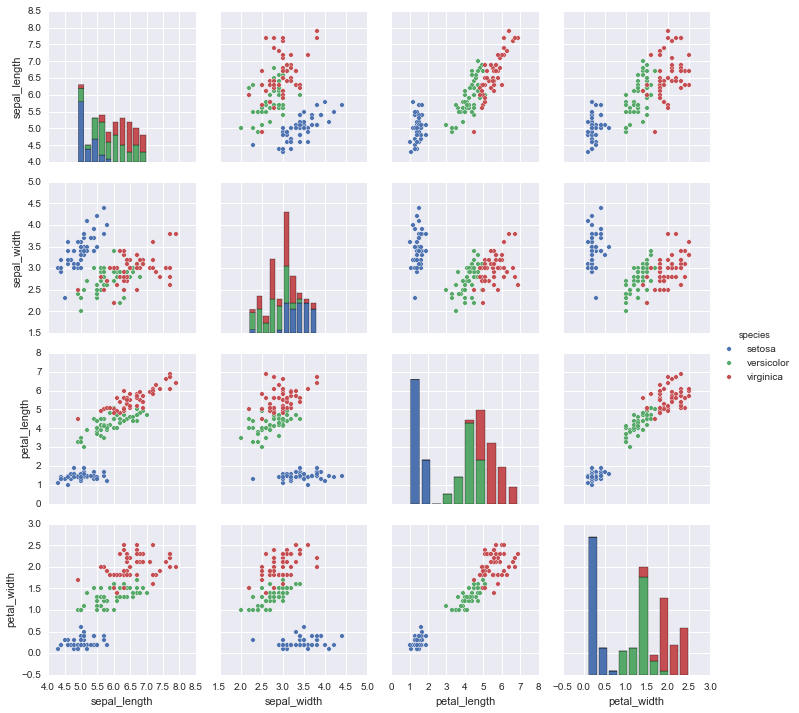

In [21]:
sns.pairplot(df, hue="species")
plt.show()

Looking at this data, another method could be to use clustering or regression to model the data without missing values and then see where the data with some missing feature values would be.  The thing to note about imputing the data in a more specialized way is that the preprocessing.impute() function would need to be called on the data itself and the Imputer could not be part of the pipeline.  

## Dealing with Different Types (Numeric, Categorical):

### Binarizing:

Binarizing is the process of converting a variable to a 0 or 1 given a certain threshold.  

To show an example for binarizing, I wanted to have a data set with both categorical and numeric data.  I downloaded an 'exercise' dataset from seaborn.

In [22]:
sns.set(style="ticks")
exercise = sns.load_dataset("exercise")

In [23]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


Let's look at a histogram of the numeric variable - pulse:

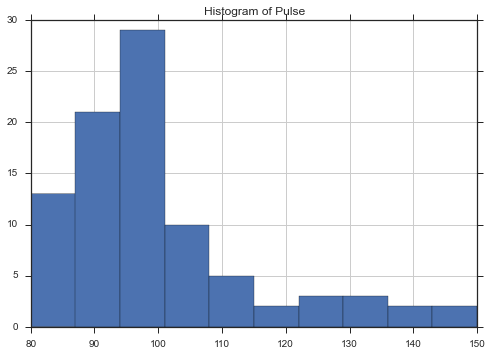

In [25]:
exercise.pulse.hist()
plt.title('Histogram of Pulse')
plt.show()

In [26]:
exercise.ix[:,'high_pulse'] = preprocessing.binarize(exercise.pulse, threshold=120)[0]

/Users/bzenchenko/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [29]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind,high_pulse
0,0,1,low fat,85,1 min,rest,0
1,1,1,low fat,85,15 min,rest,0
2,2,1,low fat,88,30 min,rest,0
3,3,2,low fat,90,1 min,rest,0
4,4,2,low fat,92,15 min,rest,0


In [30]:
exercise[exercise.high_pulse==1].head()

,Unnamed: 0,id,diet,pulse,time,kind,high_pulse
70,70,24,low fat,132,15 min,running,1
76,76,26,no fat,126,15 min,running,1
77,77,26,no fat,143,30 min,running,1
79,79,27,no fat,126,15 min,running,1
80,80,27,no fat,140,30 min,running,1


Obviously this is a simple example, we could just easily do this with a one line pandas call, but again the advantage of doing this through scikit-learn is that it can be part of the pipeline.

pandas one liner: exercise['high_pulse'] = exercise.pulse>120

### Create numerical features from the Categorical:

Since we can't just plug in the exercise data as in into a machine learning algorithm, we need to transform the data so that it only contains numerical data.  So there are 2 primary ways of doing this.  One is to create a numeric value for each of the categories in a given column, or another way is to create new features very similar to what is called "creating dummy variables" in statistics.

- LabelEncoder()
- OneHotEncoder()

In [31]:
encoder = preprocessing.LabelEncoder()

In [32]:
exercise.diet.unique()

[low fat, no fat]
Categories (2, object): [low fat, no fat]

In [33]:
encoder.fit_transform(exercise.diet)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

OneHotEncoder expects the data to be numeric, so LabelEncoder would need to be applied first to convert everything to a numeric value.

Way to do it in pandas, because 1 and 0 don't have any meaning really, it doesn't matter which one got the 1 label and which one got the 0 label.

In [35]:
exercise.diet.cat.codes.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

Let's make a deep copy of the exercise data frame so we can start modifying it.

In [36]:
exercise_numeric_df = exercise.copy()

In [37]:
exercise.columns

Index([u'Unnamed: 0', u'id', u'diet', u'pulse', u'time', u'kind',
       u'high_pulse'],
      dtype='object')

In [38]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind,high_pulse
0,0,1,low fat,85,1 min,rest,0
1,1,1,low fat,85,15 min,rest,0
2,2,1,low fat,88,30 min,rest,0
3,3,2,low fat,90,1 min,rest,0
4,4,2,low fat,92,15 min,rest,0


Let's identify the categorical columns:

In [39]:
cat_columns = ['diet','kind', 'time']

In [42]:
# Pandas: exercise_numeric_df[cat_columns] = exercise[cat_columns].apply(lambda x: x.cat.codes)

exercise_numeric_df[cat_columns] = exercise[cat_columns].apply(lambda x: encoder.fit_transform(x))

In [43]:
exercise_numeric_df.head()

,Unnamed: 0,id,diet,pulse,time,kind,high_pulse
0,0,1,0,85,0,0,0
1,1,1,0,85,1,0,0
2,2,1,0,88,2,0,0
3,3,2,0,90,0,0,0
4,4,2,0,92,1,0,0


Now we need to convert the diet, kind, and time columns into "dummy variables":

In [44]:
one_hot_encoder = preprocessing.OneHotEncoder(categorical_features=[2,4,5])

In [45]:
one_hot_encoder

OneHotEncoder(categorical_features=[2, 4, 5], dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [46]:
exercise_numeric_encoded_matrix = one_hot_encoder.fit_transform(exercise_numeric_df.values)

In [56]:
exercise_numeric_encoded_matrix.toarray()[0:10,:]

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,  85.,
          0.],
       [  1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,  85.,
          0.],
       [  1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   2.,   1.,  88.,
          0.],
       [  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   3.,   2.,  90.,
          0.],
       [  1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   4.,   2.,  92.,
          0.],
       [  1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   5.,   2.,  93.,
          0.],
       [  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   6.,   3.,  97.,
          0.],
       [  1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   7.,   3.,  97.,
          0.],
       [  1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   8.,   3.,  94.,
          0.],
       [  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   9.,   4.,  80.,
          0.]])

In [48]:
exercise_numeric_encoded_matrix.shape

(90, 12)

It's much easier to visualize what is happening using pandas, so I'll include that here as well.

In [49]:
pd.get_dummies(exercise).head()

,Unnamed: 0,id,pulse,high_pulse,diet_no fat,diet_low fat,time_1 min,time_15 min,time_30 min,kind_rest,kind_walking,kind_running
0,0,1,85,0,0,1,1,0,0,1,0,0
1,1,1,85,0,0,1,0,1,0,1,0,0
2,2,1,88,0,0,1,0,0,1,1,0,0
3,3,2,90,0,0,1,1,0,0,1,0,0
4,4,2,92,0,0,1,0,1,0,1,0,0


In [50]:
pd.get_dummies(exercise).shape

(90, 12)

So most of the time I do go through the pandas approach because it's more readable and then at the end I'll use the .values function to get the values out of the data frame.  Pandas might be a way to start exploring the data quickly, but once the algorithm is finalized, then putting the scikit learn pipeline can be what is in production.

## Scaling and Normalizing:

- StandardScaler() - z score normalization - subtract the mean, divide by the std. 
- MinMaxScaler() - data is scaled to a fixed range, usually 0 to 1.  
- Normalizer() - normalized to have length 1

Z score normalization makes the data normally distributed which is an assumption for many algorithms.  Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.  Min-max scaling transforms the data so that there is smaller standard deviations for outliers than z score.  Z score standardization is performed more frequently than min max.  However min-max scaling is used in image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). 

In [51]:
exercise_numeric_encoded_matrix

<90x12 sparse matrix of type '<type 'numpy.float64'>'
	with 549 stored elements in COOrdinate format>

In [52]:
standard_scaler = preprocessing.StandardScaler(with_mean=True)

In [57]:
standard_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
exercise_numeric_encoded_matrix.toarray()[0:5,0:8]

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.]])

In [60]:
exercise_data_scaled = standard_scaler.fit_transform(exercise_numeric_encoded_matrix.toarray()[:,0:8])

In [61]:
numpy.mean(exercise_data_scaled, axis=0)

array([  0.00000000e+00,   0.00000000e+00,   7.40148683e-17,
         7.40148683e-17,   7.40148683e-17,   4.95899618e-16,
         4.34220561e-16,   2.83723662e-16])

In [62]:
numpy.linalg.norm(exercise_data_scaled[0,:])

2.8284271247461912

In [63]:
normalizer = preprocessing.Normalizer()

In [64]:
normalizer

Normalizer(copy=True, norm='l2')

In [65]:
exercise_data_scaled_normalized = normalizer.fit_transform(exercise_data_scaled)

In [66]:
numpy.linalg.norm(exercise_data_scaled_normalized[0,:])

1.0

In [67]:
exercise_data_scaled_normalized[0:5,:]

array([[ 0.35355339, -0.35355339,  0.5       , -0.25      , -0.25      ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339, -0.25      ,  0.5       , -0.25      ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339, -0.25      , -0.25      ,  0.5       ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339,  0.5       , -0.25      , -0.25      ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339, -0.25      ,  0.5       , -0.25      ,
         0.5       , -0.25      , -0.25      ]])

## Example of pipeline:

    preprocessing_pipeline = preprocessing.Pipeline([('impute_missing', imputer), ('cat_to_numeric', label_encoder), ('one_hot_encoding', one_hot_encoding), ('standard_scaler', standard_scaler), ('normalizer', normalizer)])

    preprocessing_pipeline.fit_transform(X)


- FunctionTransformer() - Can create your own transformer function to include in the pipeline
- The last item can be an estimator with fit_predict and score functions

In [68]:
from sklearn import pipeline

I was excited to find the FunctionTransformer functionality, this means we can create our own modification of the data.  This is newly available in scikit-learn v 0.17 which just recently was released.

In [69]:
my_function = preprocessing.FunctionTransformer(func=lambda x: x.toarray()[:,0:8], \
                                                validate=True, accept_sparse=True, pass_y=False)

In [70]:
preprocessing_pipeline = pipeline.Pipeline([('one_hot_encoding', one_hot_encoder), \
                                            ('my_function', my_function), \
                                            ('standard_scaler', standard_scaler), \
                                            ('normalizer', normalizer)])

In [71]:
preprocessing_pipeline.fit_transform(exercise_numeric_df.values)[0:5,:]

array([[ 0.35355339, -0.35355339,  0.5       , -0.25      , -0.25      ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339, -0.25      ,  0.5       , -0.25      ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339, -0.25      , -0.25      ,  0.5       ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339,  0.5       , -0.25      , -0.25      ,
         0.5       , -0.25      , -0.25      ],
       [ 0.35355339, -0.35355339, -0.25      ,  0.5       , -0.25      ,
         0.5       , -0.25      , -0.25      ]])

# References:

- "scikit-learn cookbook" by Trent Hauck
- https://en.wikipedia.org/wiki/Data_pre-processing
- "Data Cleaning and Pre-processing" http://www.mimuw.edu.pl/~son/datamining/DM/4-preprocess.pdf
- http://topepo.github.io/caret/preprocess.html
- Built in scikit-learn preprocessing functions: http://scikit-learn.org/stable/modules/preprocessing.html
- http://www.csun.edu/~twang/595DM/Slides/Week2.pdf
- http://freecontent.manning.com/real-world-machine-learning-pre-processing-data-for-modeling/
- Data Mining: Data and Preprocessing: http://staffwww.itn.liu.se/~aidvi/courses/06/dm/lectures/lec2.pdf
- https://en.wikipedia.org/wiki/Feature_scaling
